In [35]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import fuzzy as fy
from collections import namedtuple
from collections import defaultdict
import numpy as np
from clean_data import clean_data_from_frame
import seaborn as sns

In [2]:
df = pd.read_csv('../../StateNames.csv')

In [ ]:
nat = pd.read_csv('NationalNames.csv')

In [3]:
sample = df.sample(20000)

In [229]:
samp = nat.sample(20000)

In [181]:
df_decade = df[(df['Year'] > 2000)]

In [182]:
soundex = fy.Soundex(4)
sample['Soundex'] = sample.Name.apply(soundex)
sample['nyiis'] = sample.Name.apply(fy.nysiis)

In [230]:
samp['Soundex'] = samp.Name.apply(soundex)
samp['nyiis'] = samp.Name.apply(fy.nysiis)

In [183]:
sample['new_name'] = sample.Name.str.lower()

In [231]:
samp['new_name'] = samp.Name.str.lower()

In [184]:
old_test = pd.read_table('old-testament.txt')
old_test.columns = ['names']
names_list = [name.lower() for name in old_test.names]
cond_list = '|'.join(names_list)

In [185]:
new_col = sample.Name.str.contains(cond_list)
sample = pd.concat([sample, new_col],axis=1)

In [186]:
col_list = sample.columns.tolist()
col_list[9] = 'biblical'
sample.columns = col_list

In [187]:
# sample.groupby(['Year','Name']).Count.sum()

In [188]:
sample = sample.set_index(['new_name', 'Year'])

In [232]:
samp = samp.set_index(['new_name', 'Year'])

In [189]:
dictionary = sample.to_dict(orient='index')

In [190]:
all_names = set()
for k in dictionary:
    all_names.add(k[0])

In [191]:
names_vals = defaultdict(int)

for k in dictionary:
    names_vals[k[0]] += dictionary[k]['Count']

In [193]:
name_group = ['fawn', 'trenton', 'aiden']

In [192]:
name_group_vals = defaultdict(int)

for name in name_group:
    for k in dictionary:
        row_name = k[0]
        if row_name == name:
            name_group_vals[k[1]] += dictionary[k]['Count']

In [194]:
name_group_vals

defaultdict(int,
            {1970: 5,
             1985: 7,
             1987: 6,
             1992: 33,
             1993: 38,
             2000: 10,
             2003: 94,
             2011: 57,
             2014: 835})

In [195]:
#INPUT: A dictionary with keys = (name, year) and values of a dictionary with Counts for that 
# name and year comination; a list of names for which to sum their counts
# OUTPUT: A dictionary with counts of the names given broken down by year (year is the key, 
#                                                                         count the value)

def name_counter(values_dict, name_list):
    output_dict = defaultdict(int)
#     for name in name_list:
    for k in values_dict:
        row_name = k[0]
        year = k[1]
        if row_name in name_list:
            output_dict[year] += values_dict[k]['Count']
    return output_dict

In [196]:
###Takes a dictionary with counts of a group of names by year (year is the key)
# and returns a plot of the accumulated sums of these names

def name_plotter(input_dict):
    years = input_dict.keys()
    x_min = min(years)
    x_max = max(years)
    
    X = []
    Y = []
    
    for x, y in input_dict.iteritems():
        X.append(x)
        Y.append(y)
    
    zipped_vals = sorted(zip(X,Y))
    sorted_x, sorted_y = zip(*zipped_vals)
    
    fig = plt.figure(figsize=(10,8))
    plt.plot(sorted_x, sorted_y)
    plt.xlabel('Year')
    plt.ylabel('Name Count')

In [ ]:
###Takes a dictionary with counts of a group of names by year (year is the key)
# and returns a plot of each name trend

def name_plotter(input_dict):
    years = input_dict.keys()
    x_min = min(years)
    x_max = max(years)
    
    X = []
    Y = []
    
    for x, y in input_dict.iteritems():
        X.append(x)
        Y.append(y)
    
    zipped_vals = sorted(zip(X,Y))
    sorted_x, sorted_y = zip(*zipped_vals)
    
    fig = plt.figure(figsize=(10,8))
    plt.plot(sorted_x, sorted_y)
    plt.xlabel('Year')
    plt.ylabel('Name Count')

In [197]:
big_test = name_counter(dictionary,all_names)

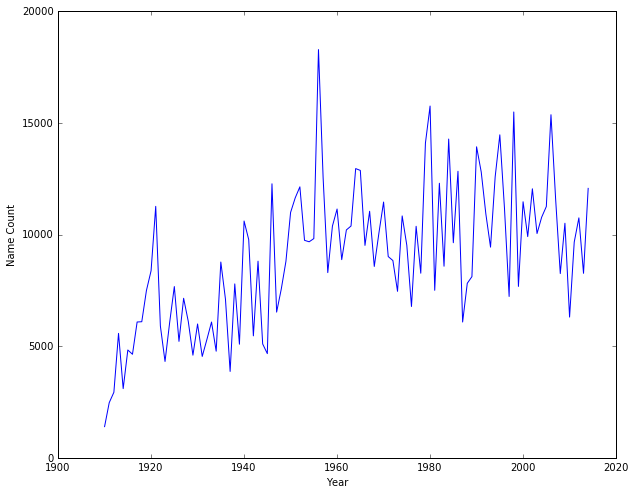

In [198]:
name_plotter(big_test)

In [199]:
benny_y = sample[sample.index.map(lambda x: x[0] == 'benny')].Count.values

In [200]:
benny_x = sample[sample.index.map(lambda x: x[0] == 'benny')].index.map(lambda x: x[1])

In [201]:
benny_x

array([1966, 1918, 1955, 1999, 1952, 1960, 1934])

In [202]:
def plot_name(x,y):
    zipped_vals = sorted(zip(x,y))
    X,Y = zip(*zipped_vals)
    
    fig = plt.figure(figsize=(10,8))
    plt.plot(X,Y)
    plt.xlabel('Year')
    plt.ylabel('Name Count')

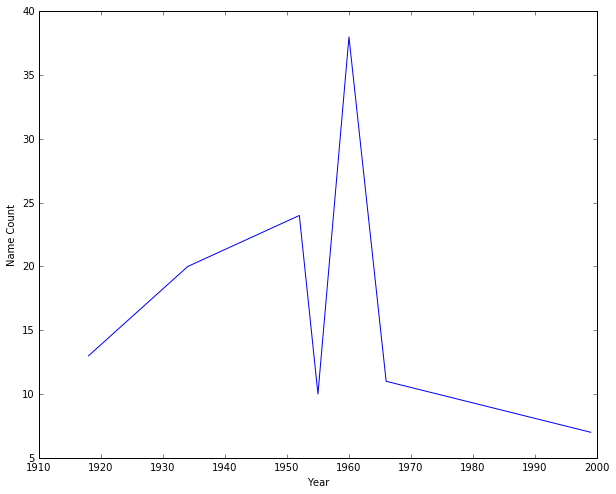

In [203]:
plot_name(benny_x,benny_y)

In [9]:
df.head()

Id      Name Gender  Count_by_name  new_name    name_gender  \
Year State                                                                
1910 AK      1      Mary      F             14      mary      (mary, F)   
     AK      2     Annie      F             12     annie     (annie, F)   
     AK      3      Anna      F             10      anna      (anna, F)   
     AK      4  Margaret      F              8  margaret  (margaret, F)   
     AK      5     Helen      F              7     helen     (helen, F)   

           tuple_index  Count  count_norm  
Year State                                 
1910 AK     (1910, AK)    115    0.121739  
     AK     (1910, AK)    115    0.104348  
     AK     (1910, AK)    115    0.086957  
     AK     (1910, AK)    115    0.069565  
     AK     (1910, AK)    115    0.060870

In [6]:
df = clean_data_from_frame(df)

In [10]:
names_set = set()
for tup in df.name_gender.values:
    names_set.add(tup[0])

len(names_set)

30274

In [19]:
def plot_loop(dataframe, names_list):
    
    fig = plt.figure(figsize=(15,12))
    
    for name in names_list:
        y = dataframe[dataframe.name_gender.map(lambda x: x[0] == name)].Count_by_name.values
        x = dataframe[dataframe.name_gender.map(lambda x: x[0] == name)].tuple_index.map(lambda x: x[0])
    
        zipped_vals = sorted(zip(x,y))
        X,Y = zip(*zipped_vals)

        plt.plot(X,Y)
    plt.xlabel('Year')
    plt.ylabel('Name Count')
    plt.ylim([5,200])
    plt.xlim([1910, 2014])

In [20]:
subset = list(names_set)[0:100]

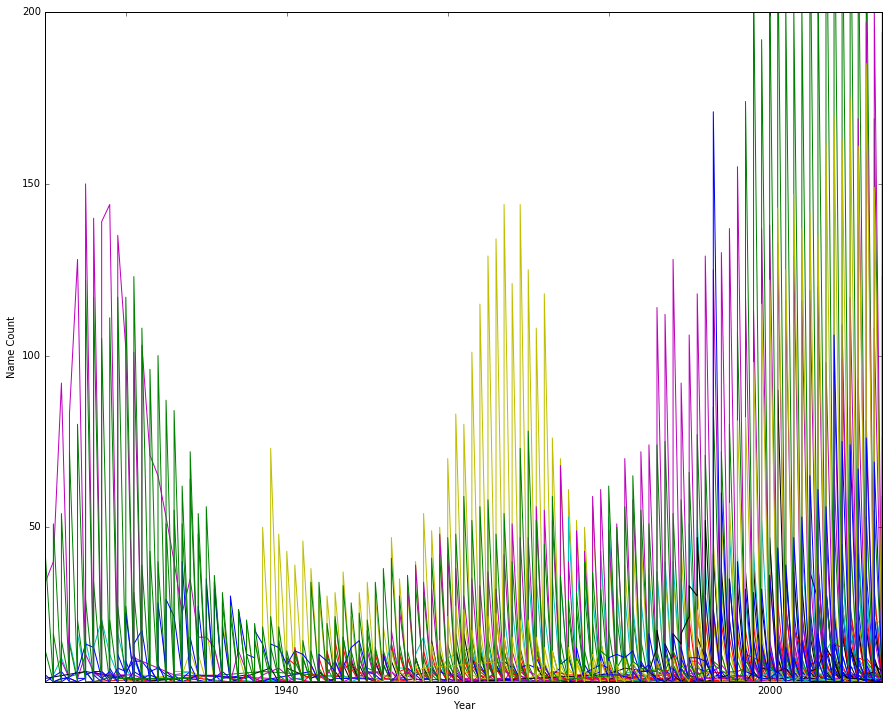

In [21]:
plot_loop(df, subset)

In [214]:
sample.head()

,,Id,Name,Gender,State,Count,Soundex,nyiis,biblical
new_name,Year,,,,,,,,
joanna,1967,1340021,JOANNA,F,HI,8,J500,JAN,False
xavier,2003,880500,XAVIER,M,CT,64,X160,XAVAR,False
debra,1969,5570892,DEBRA,F,WV,87,D160,DABR,False
carolyn,1935,3237637,CAROLYN,F,NE,82,C645,CARALAN,False
darian,2001,1046473,DARIAN,F,FL,6,D650,DARAN,False


In [215]:
sample['syl_1'] = sample.Soundex.str[0]
sample['syl_2'] = sample.Soundex.str[1]
sample['syl_3'] = sample.Soundex.str[2]
sample['syl_4'] = sample.Soundex.str[3]

In [221]:
sample['sound_strip'] = sample.Soundex.map(lambda x: x.strip('0'))

In [225]:
sample['first_syl'] = sample.sound_strip.str[0]
sample['last_syl'] = sample.sound_strip.str[-1]

In [233]:
samp['sound_strip'] = samp.Soundex.map(lambda x: x.strip('0'))
samp['first_syl'] = samp.sound_strip.str[0]
samp['last_syl'] = samp.sound_strip.str[-1]

In [234]:
samp.head()

,,Id,Name,Gender,Count,Soundex,nyiis,sound_strip,first_syl,last_syl
new_name,Year,,,,,,,,,
auther,1955,523652,AUTHER,M,19,A360,ATAR,A36,A,6
zayra,1996,1227451,ZAYRA,F,22,Z600,ZYR,Z6,Z,6
eric,1893,33221,ERIC,M,13,E620,ERAC,E62,E,2
dae,1977,818247,DAE,F,5,D000,D,D,D,D
annisten,2009,1634449,ANNISTen,F,9,A523,ANASTAN,A523,A,3


In [ ]:
series = pd.Series(df.groupby(['Name','Year']))

In [7]:
def plot_single_name(df,name):
    series = df.groupby(['Name','Year'])[name]
    fig = plt.figure(figsize=(12,8))
    plt.plot(series)

In [13]:
series

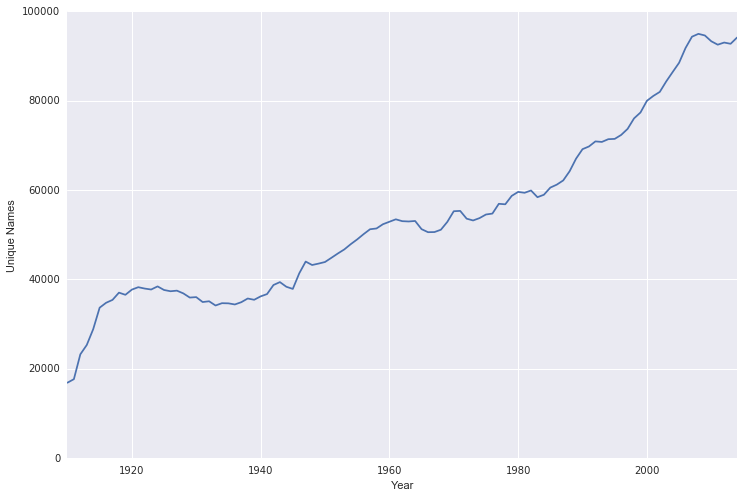

In [36]:
###There is a steady increase in names over time
fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(111)
plt.ylim([5,100000])
plt.xlim([1910, 2014])

sns.plt.plot(df.groupby(df.index.get_level_values(level=0)).count()['Name'])

plt.xlabel('Year')
plt.ylabel('Unique Names')

